In [1]:
# NOTE: Run 'python generate_data.py' before executing notebook to generate 'troop_movements.csv' file

import pandas as pd
import numpy as np

data = pd.read_csv('troop_movements.csv')

print("First few rows of the DataFrame:")
print(data.head())

First few rows of the DataFrame:
             timestamp  unit_id           unit_type empire_or_resistance  \
0  2025-03-17 16:42:04        1              x-wing           resistance   
1  2025-03-17 16:42:03        2  resistance_soldier           resistance   
2  2025-03-17 16:42:02        3         tie_fighter           resistance   
3  2025-03-17 16:42:01        4               at-at           resistance   
4  2025-03-17 16:42:00        5        tie_silencer               empire   

   location_x  location_y  destination_x  destination_y  homeworld  
0           7          10              9              4     Ryloth  
1           3           8              1             10  Malastare  
2           9           4              2              8   Iridonia  
3           9          10              1              7   Tatooine  
4          10          10              3              8    Troiken  


In [2]:
#Showing Counts of Empire vs. Resistance
df_Count = pd.DataFrame(data)

print("\nSorting the DataFrame by empire_or_resistance:")
value_counts = df_Count['empire_or_resistance'].value_counts().reset_index()

print(value_counts.head())


Sorting the DataFrame by empire_or_resistance:
  empire_or_resistance  count
0           resistance    510
1               empire    490


In [2]:
unit_type_counts_size = data.groupby('unit_type').size()
print("Counts of characters by unit_type", unit_type_counts_size)


Counts using size():
 unit_type
at-at                 118
at-st                 117
resistance_soldier    148
stormtrooper          130
tie_fighter           128
tie_silencer          111
unknown               135
x-wing                113
dtype: int64


In [4]:
#Showing Counts of Characters By Homeworld
df_Count = pd.DataFrame(data)

print("\nSorting the DataFrame by empire_or_resistance:")
value_counts2 = df_Count['homeworld'].value_counts(ascending=True).reset_index()

print(value_counts2.head())



Sorting the DataFrame by empire_or_resistance:
     homeworld  count
0      Vulpter     15
1  Aleen Minor     16
2      Stewjon     17
3      Quermia     18
4        Kalee     19


In [5]:
def is_resistance(row):
        if row['empire_or_resistance'] == "resistance":
            return True
        else:
            return False
data['is_resistance'] = data.apply(is_resistance, axis=1)
print(data.head())

             timestamp  unit_id     unit_type empire_or_resistance  \
0  2025-03-17 16:28:52        1  stormtrooper           resistance   
1  2025-03-17 16:28:51        2   tie_fighter               empire   
2  2025-03-17 16:28:50        3  stormtrooper           resistance   
3  2025-03-17 16:28:49        4  stormtrooper           resistance   
4  2025-03-17 16:28:48        5   tie_fighter           resistance   

   location_x  location_y  destination_x  destination_y homeworld  \
0           3           7              7              2   Tholoth   
1           7           6              3              5     Skako   
2           6           8              7              5  Alderaan   
3           4           7              9              5   Iktotch   
4           5          10             10              5  Dathomir   

   is_resistance  
0           True  
1          False  
2           True  
3           True  
4           True  


In [7]:
! pip install seaborn
! pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


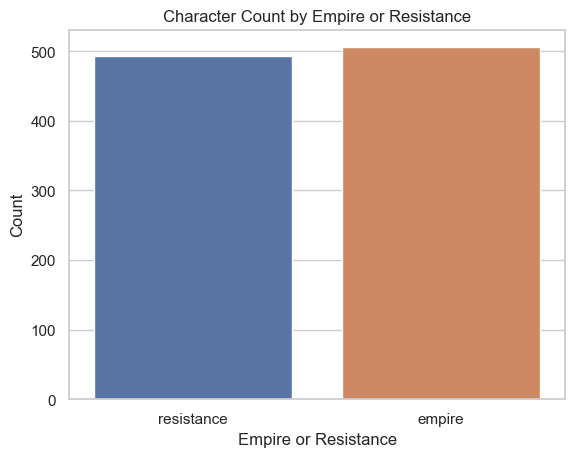

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid")

sns.countplot(data=data, x="empire_or_resistance", hue= "empire_or_resistance")
plt.title('Character Count by Empire or Resistance')
plt.xlabel('Empire or Resistance')
plt.ylabel('Count')
plt.show()